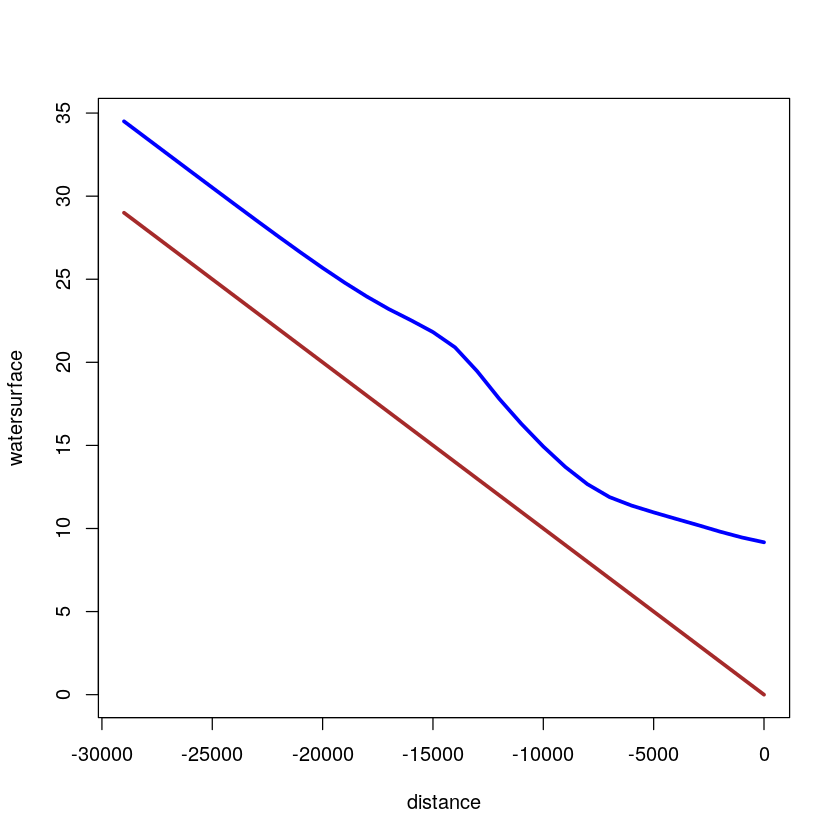

In [1]:
###### Fixed Space Step Method for Backwater Curve  ###########
#Uses Hamming's Method for Matching Specific Energy at Sections
rm(list=ls())
################
imax <- 30             #number of computational stations
dx <- -1000            #spacing between stations
manningsN <- 0.033     #mannings n value
slopeChan <- 0.001     #channel slope
normalD  <- 5.6        #upstream station normal depth
controlD <- 9.17       #downstream station control depth
discharge <- 100       #steady discharge
#################
topwidth <- numeric(0) # allocate a topwidth vector
# populate the vector -- should use a file read for general program
topwidth <- c(10,10,10,11,12,13,14,13,12,11,10,9,8,7,8,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10)
# populate the vector (should convert to a file read)
velo <- rep(0,imax) # allocate a velocity vector, put zeroes everywhere
velo[1] <- discharge/topwidth[1]/controlD #set velocity at control section
depth <- rep(0,imax) # allocate a depth vector, put zeroes everywhere
depth[1] <- controlD
spDepth <- rep(0,imax) # allocate a sp. depth vector, put zeroes everywhere
spDepth[1] <- ((velo[1]^2)/(2.0*9.81)) + depth[1]
spDepthT <- rep(0,imax) # allocate a sp. depth vector, put zeroes everywhere
#################
for(i in 2:imax){
  depth[i] <- 10
  difn <- 1.0
  dh <- 1.0
  while(dh > 0.0001){
    dif <- difn
    ntest <- 0
    depth[i]<-depth[i]-dh
### do while loop 2
    while(dh > 0){
      velo[i] <- discharge/topwidth[i]/depth[i]
      avgDepth <- 0.5*(depth[i-1]+depth[i])
      avgTopW <- 0.5*(topwidth[i-1]+topwidth[i])
      avgV <- discharge/avgTopW/avgDepth
      hydR <- avgDepth*avgTopW/(avgTopW+2.0*avgDepth)
      sFric <- (avgV^2)*(manningsN^2)/(hydR^(1.33))
      spDepth[i] <- spDepth[i-1]+(slopeChan-sFric)*dx
      spDepthT[i] <- depth[i]+(velo[i]^2/(2.0*9.81))
      difn <- spDepthT[i]-spDepth[i]
 #     print(difn)
#      print(cbind(i,depth[i],spDepth[i],spDepthT[i],dh))
        if(ntest > 0){
          dh <- dh/10.0
          break #break from do while loop 2
          }
        if(dif*difn > 0){
          break #break from do while loop 2
        }
      depth[i] <- depth[i] + dh
      ntest <- 1
    } #do while loop 2
  } # do while loop 1
} # for loop
##### report results #####
# build x-vector
distance <- seq(0,(imax-1)*dx,dx)
bottom <- -distance*slopeChan
watersurface <- depth+bottom
plot(distance,watersurface,ylim=c(0,max(watersurface)),type="l",col="blue",lwd=3)
lines(distance,bottom,col="brown",lwd=3)